## K Nearest Neighbors
KNN algorithm can be used for both classification and regression problems.\
[K Nearest Neighbors | Krish Naik](https://www.youtube.com/watch?v=otolSnbanQk&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=62)

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  TARGET CLASS  
0    0.643798  0.879422  1.231409             1  
1    1.013546  0.621552  1.492702             0  
2    1.154483  0.957877  1.285597             0  
3    1.380003  1.522692  1.153093             1  
4    0.646691  1.463812  1.419167             1  
..        ...       ...       ...           ...  
995  0.319752  1.117340  1.348517             1  
996  0.713193  0.958684  1.663489             0  
997  0.389584  0.919191  1.385504             1  
998  1.061338  1.277456  1.188063             1  
999  0.907962  1.257190  1.364837             1  

[1000 rows x 11 columns]

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, ***the scale of the variables matters***. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [10]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [11]:
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_features.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

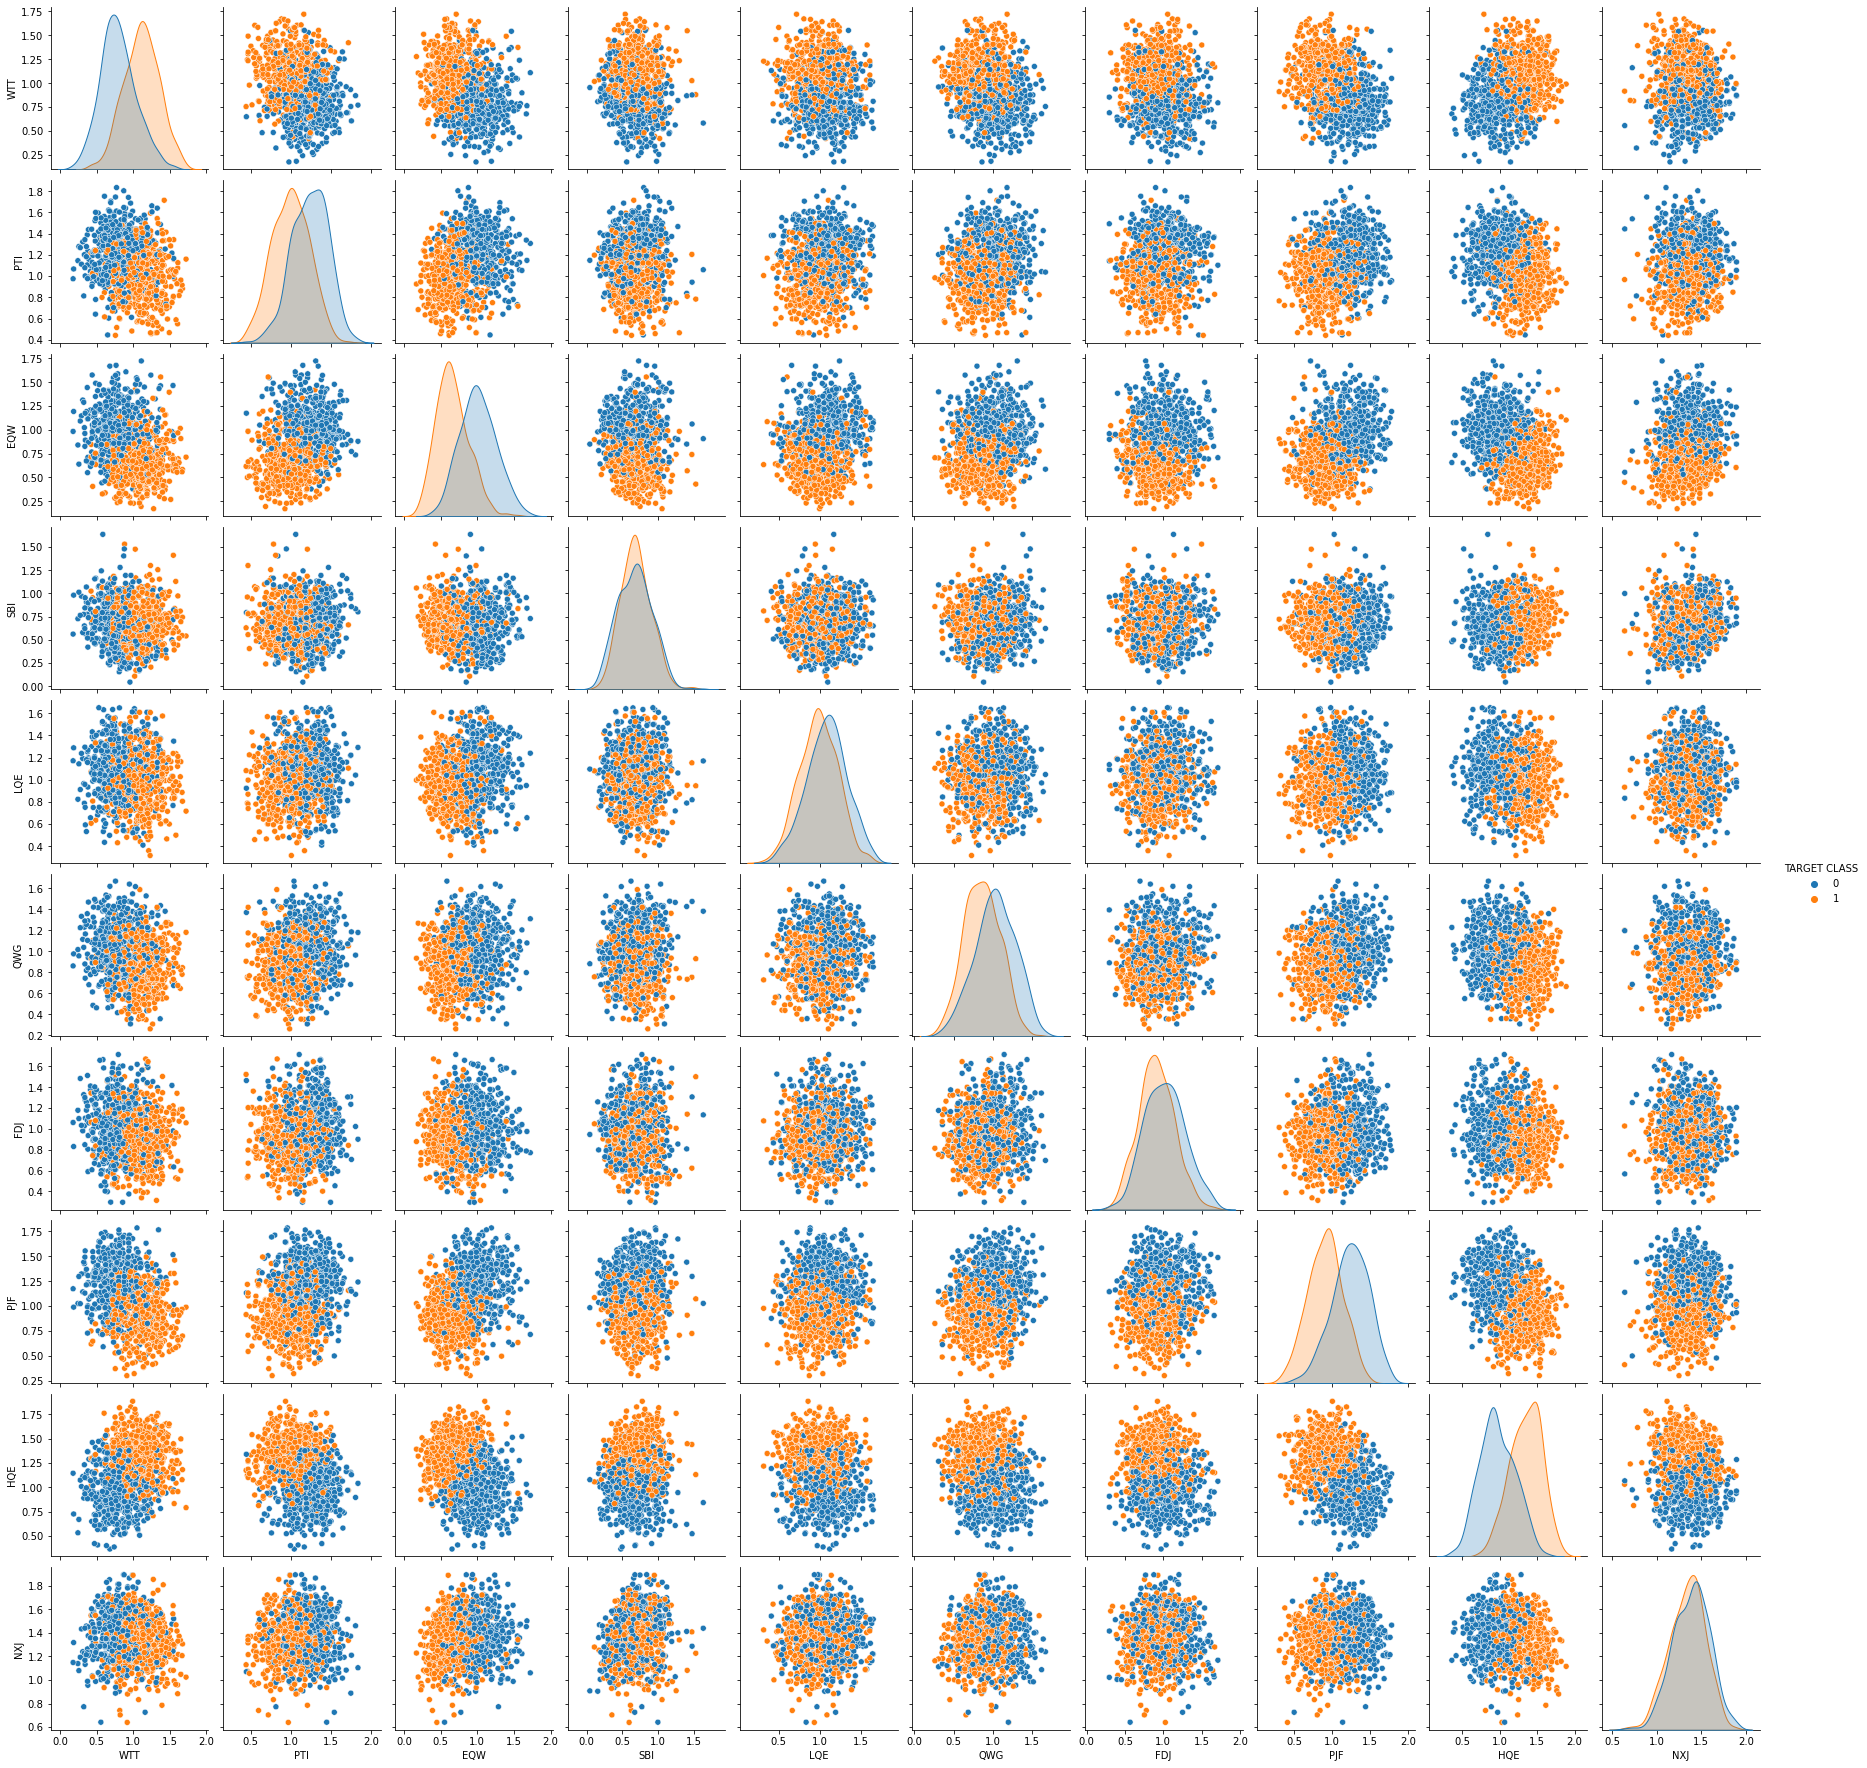

In [12]:
import seaborn as sns

sns.pairplot(df,hue='TARGET CLASS')

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

In [19]:
pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1], d

## Predictions and Evaluations

Let's evaluate our KNN model!

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,pred))

[[121  14]
 [ 10 155]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       135
           1       0.92      0.94      0.93       165

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [23]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    score=cross_val_score(knn,df_features,df['TARGET CLASS'],cv=10)
    
    accuracy_rate.append(score.mean())
    

In [24]:
# error_rate = []

# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
#     error_rate.append(1-score.mean())

In [25]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Accuracy')

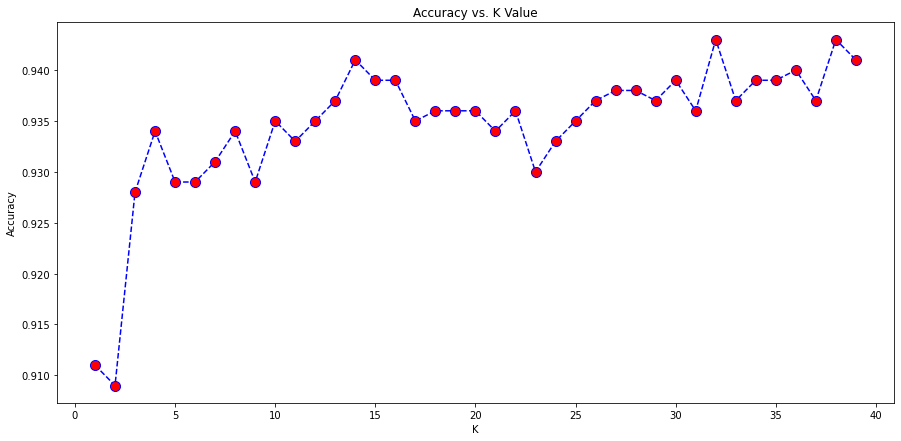

In [27]:
plt.figure(figsize=(15,7))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

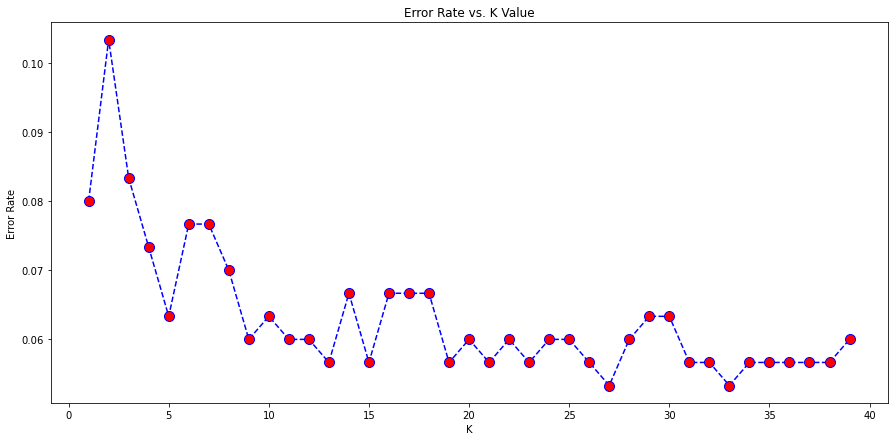

In [26]:
plt.figure(figsize=(15,7))
# plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!


Consider as Accuracy We can take k =23
Consider as Error rate We can take k =23



In [28]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[121  14]
 [ 10 155]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       135
           1       0.92      0.94      0.93       165

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [29]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[128   7]
 [ 10 155]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       135
           1       0.96      0.94      0.95       165

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':range(1,40)}

knn = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 38}

In [43]:
# NOW WITH K=38
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=38')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=38


[[128   7]
 [ 10 155]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       135
           1       0.96      0.94      0.95       165

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':range(1,40)}

knn = neighbors.KNeighborsClassifier()

grid = GridSearchCV(knn, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9457142857142857
{'n_neighbors': 38}
KNeighborsClassifier(n_neighbors=38)


## KNN Regression

**Here  Take the k nearest Neighbors data point And There mean is the Output.** 

In [45]:

# Just Small Change Classifier er Jaygay Regressor
# Choose K value

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(1,20):
    
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    
    pred=model.predict(X_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.282842712474619
RMSE value for k=  2 is: 0.2598076211353316
RMSE value for k=  3 is: 0.2464563668090982
RMSE value for k=  4 is: 0.2336307628146031
RMSE value for k=  5 is: 0.22832725052724945
RMSE value for k=  6 is: 0.22339965847647889
RMSE value for k=  7 is: 0.22931426910160965
RMSE value for k=  8 is: 0.22314046398326473
RMSE value for k=  9 is: 0.21858128414340006
RMSE value for k=  10 is: 0.21633307652783937
RMSE value for k=  11 is: 0.21500208212202135
RMSE value for k=  12 is: 0.21468107267051503
RMSE value for k=  13 is: 0.21289773081689303
RMSE value for k=  14 is: 0.2134507542497705
RMSE value for k=  15 is: 0.21137994578833982
RMSE value for k=  16 is: 0.2121013417370731
RMSE value for k=  17 is: 0.21559712952789742
RMSE value for k=  18 is: 0.21312393272363497
RMSE value for k=  19 is: 0.21050438482261494


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':range(1,20)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)